## Preparação dos dados para modelação

**IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
import numpy as np



**1. Carregar dataset e inspeção**


In [2]:
# Usa-se keep_default_na=False para impedir que a string "None" seja convertida para NaN, pois representa uma classe válida da variável alvo.

train_df = pd.read_csv("training_data.csv", encoding="latin-1",keep_default_na=False, na_values=['NULL', ''])
test_df = pd.read_csv("test_data.csv", encoding="latin-1",keep_default_na=False, na_values=['NULL', ''])

**Verificar se os dados foram lidos corretamente**

In [3]:
train_df.shape


(6812, 14)

In [4]:
test_df.shape

(1500, 13)

In [5]:
train_df.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [6]:
test_df.columns

Index(['city_name', 'record_date', 'AVERAGE_FREE_FLOW_SPEED',
       'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY',
       'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY',
       'AVERAGE_WIND_SPEED', 'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION',
       'AVERAGE_RAIN'],
      dtype='object')

In [7]:
train_df.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN





**2. ANÁLISE EXPLORATÓRIA INICIAL (EDA)**


**Informação mais geral**

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

**Estatisticas descritivas**

In [9]:
train_df.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


**Número de valores únicos por coluna (para detetar colunas inúteis)**

In [10]:
unique_counts = train_df.nunique().sort_values()
print(unique_counts)

city_name                     1
AVERAGE_PRECIPITATION         1
LUMINOSITY                    3
AVERAGE_SPEED_DIFF            5
AVERAGE_CLOUDINESS            9
AVERAGE_RAIN                 13
AVERAGE_WIND_SPEED           15
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_FREE_FLOW_TIME      442
AVERAGE_TIME_DIFF          1151
record_date                6812
dtype: int64


**Histogramas das variáveis numéricas**

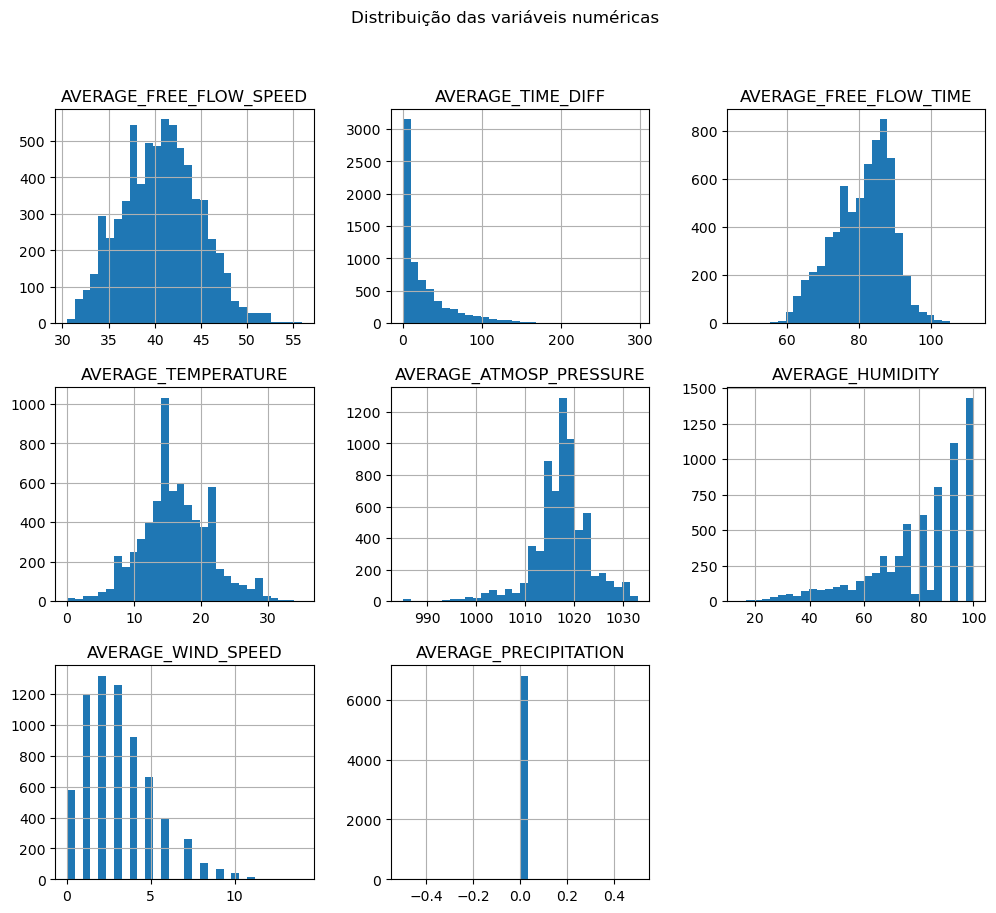

In [11]:
num_cols = train_df.select_dtypes(include=["float64", "int64"]).columns
train_df[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribuição das variáveis numéricas")
plt.show()

**Análise da correlação entre variáveis**

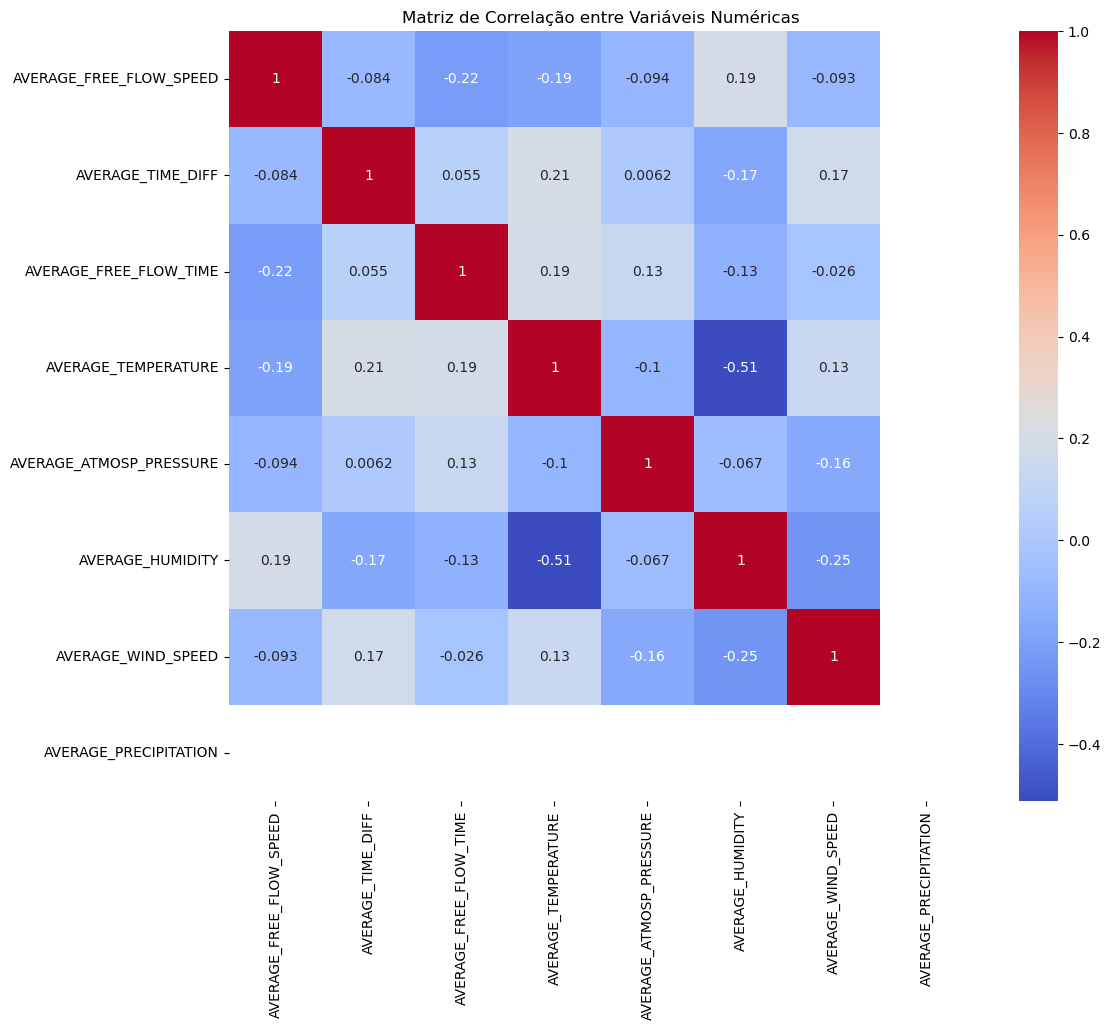

In [12]:
# Matriz de correlação das variáveis numéricas
plt.figure(figsize=(12,10))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

**3. ANÁLISE DE OUTLIERS**

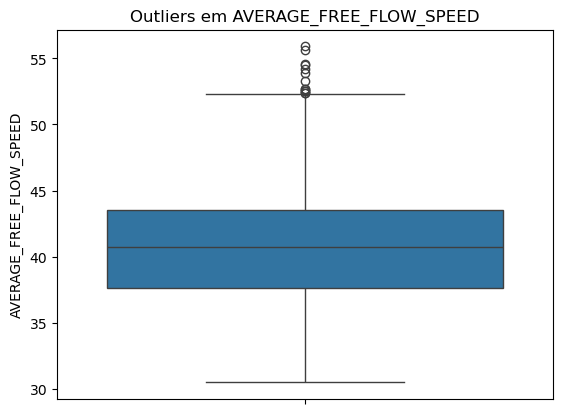

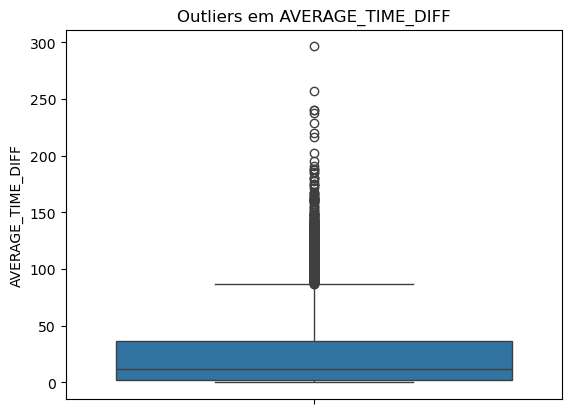

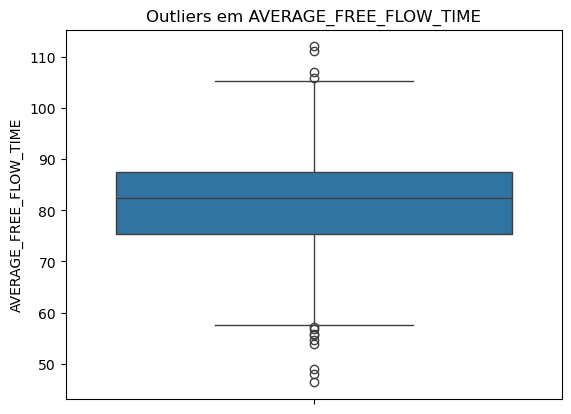

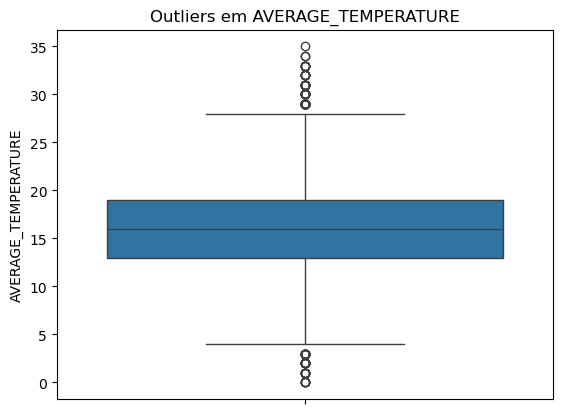

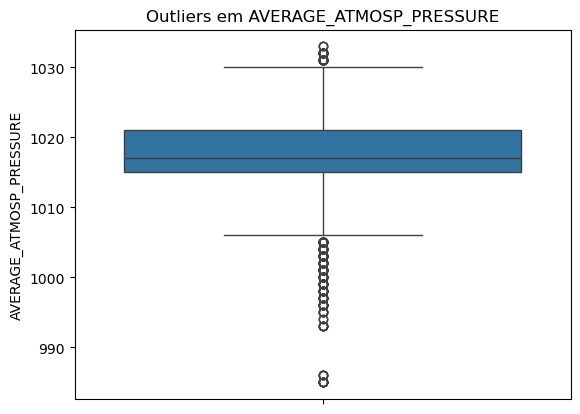

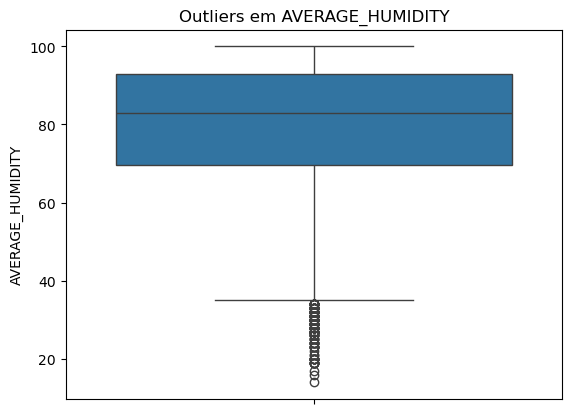

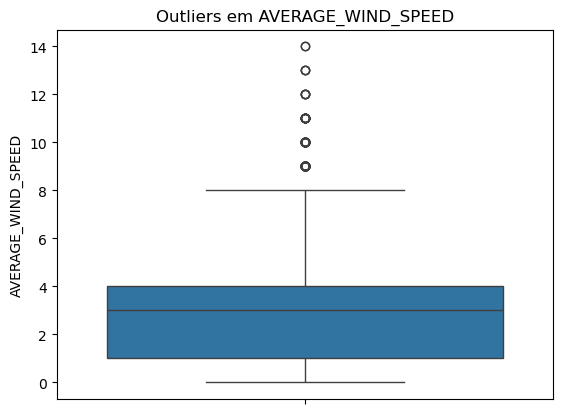

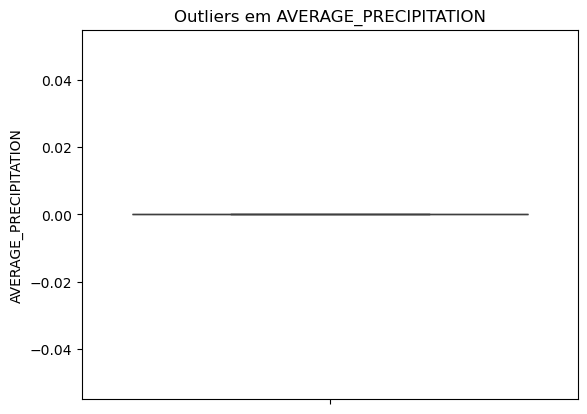

In [13]:
# Identificação visual de possíveis outliers nas variáveis numéricas
for col in num_cols:
    sns.boxplot(y=train_df[col])
    plt.title(f"Outliers em {col}")
    plt.show()

**4. ANÁLISE E TRATAMENTO DE MISSING VALUES**

**Contagem de valores em falta por coluna**

In [14]:
train_df.isna().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

**Visualização gráfica dos missing values**

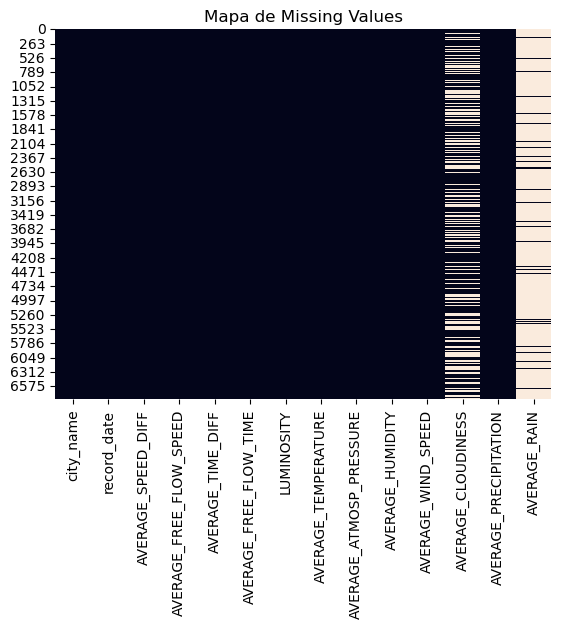

In [15]:
sns.heatmap(train_df.isnull(), cbar=False)
plt.title("Mapa de Missing Values")
plt.show()

**Percentagem de missing values em AVERAGE_RAIN**

In [16]:
missing_percent = train_df['AVERAGE_RAIN'].isnull().mean() * 100
print(missing_percent)

91.73517322372284


**Remoção da coluna AVERAGE_RAIN devido a >90% de valores em falta**

In [17]:
rain_map = {
    None: 0,
    "": 0,
    "chuvisco fraco": 1,
    "chuva fraca": 1,
    "aguaceiros fracos": 1,
    "chuvisco e chuva fraca": 1,

    "chuva leve": 2,
    "trovoada com chuva leve": 2,

    "chuva moderada": 3,
    "aguaceiros": 3,
    "chuva": 3,
    "trovoada con chuva": 3,          # caso de typo
    "trovoada com chuva": 3,

    "chuva forte": 4,
    "chuva de intensidade pesado": 4,
    "chuva de intensidade pesada": 4,
}
def map_rain(x):
    if pd.isna(x):
        return 0
    return rain_map.get(x.strip().lower(), 3)   # fallback = intensidade média

train_df["RAIN_INTENSITY"] = train_df["AVERAGE_RAIN"].apply(map_rain).astype("int8")
test_df["RAIN_INTENSITY"]  = test_df["AVERAGE_RAIN"].apply(map_rain).astype("int8")

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
 14  RAIN_INTENSITY          

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                1500 non-null   object 
 1   record_date              1500 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 3   AVERAGE_TIME_DIFF        1500 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 5   LUMINOSITY               1500 non-null   object 
 6   AVERAGE_TEMPERATURE      1500 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 8   AVERAGE_HUMIDITY         1500 non-null   float64
 9   AVERAGE_WIND_SPEED       1500 non-null   float64
 10  AVERAGE_CLOUDINESS       901 non-null    object 
 11  AVERAGE_PRECIPITATION    1500 non-null   float64
 12  AVERAGE_RAIN             140 non-null    object 
 13  RAIN_INTENSITY           1500 non-null   int8   
dtypes: float64(8), int8(1), 

In [20]:
train_df['RAIN_INTENSITY']

0       0
1       0
2       0
3       0
4       0
       ..
6807    0
6808    0
6809    0
6810    0
6811    0
Name: RAIN_INTENSITY, Length: 6812, dtype: int8

In [21]:
train_df.drop('AVERAGE_RAIN', axis= True, inplace = True)

In [22]:
test_df.drop('AVERAGE_RAIN', axis= True, inplace = True)

**5. Remoção de Features Redundantes**


**Remoção de colunas com apenas um valor possível (nenhuma variabilidade)**


In [23]:
# No caso vai ser city_name e AVERAGE_PRECIPITATION
train_df.drop(columns=["city_name", "AVERAGE_PRECIPITATION"], inplace= True)

In [24]:
test_df.drop(columns=["city_name", "AVERAGE_PRECIPITATION"], inplace= True)

**Validar remoção**

In [25]:
train_df.columns

Index(['record_date', 'AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED',
       'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY',
       'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY',
       'AVERAGE_WIND_SPEED', 'AVERAGE_CLOUDINESS', 'RAIN_INTENSITY'],
      dtype='object')

In [26]:
test_df.columns

Index(['record_date', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'RAIN_INTENSITY'],
      dtype='object')

**6. Processamento da Variável Temporal (record_date)**

**Conversão da data para datetime**

In [27]:
train_df['record_date'] = pd.to_datetime(train_df['record_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [28]:
test_df['record_date'] = pd.to_datetime(test_df['record_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [29]:
train_df['record_date'].head()

0   2019-08-29 07:00:00
1   2018-08-10 14:00:00
2   2019-09-01 16:00:00
3   2019-02-26 11:00:00
4   2019-06-06 12:00:00
Name: record_date, dtype: datetime64[ns]

In [30]:
test_df['record_date'].head()

0   2019-02-13 23:00:00
1   2018-11-28 20:00:00
2   2018-08-14 05:00:00
3   2019-07-06 17:00:00
4   2018-10-15 06:00:00
Name: record_date, dtype: datetime64[ns]

**Garantia de ausência de datas inválidas depois**

In [31]:
assert train_df['record_date'].isnull().sum() == 0, 'missing record date'

In [32]:
assert test_df['record_date'].isnull().sum() == 0, 'missing record date'

**7. Feature Engineering**

**Extração de componentes temporais**

In [33]:
train_df['record_date_year'] = train_df['record_date'].dt.year
train_df['record_date_month'] = train_df['record_date'].dt.month
train_df['record_date_day'] = train_df['record_date'].dt.day
train_df['record_date_hour'] = train_df['record_date'].dt.hour 
train_df['record_date_minute'] = train_df['record_date'].dt.minute
train_df['record_date_seconds'] = train_df['record_date'].dt.second

# Day of week (0 = Monday, 6 = Sunday)
train_df['day_of_week'] = train_df['record_date'].dt.dayofweek


In [34]:
test_df['record_date_year'] = test_df['record_date'].dt.year
test_df['record_date_month'] = test_df['record_date'].dt.month
test_df['record_date_day'] = test_df['record_date'].dt.day
test_df['record_date_hour'] = test_df['record_date'].dt.hour 
test_df['record_date_minute'] = test_df['record_date'].dt.minute
test_df['record_date_seconds'] = test_df['record_date'].dt.second

# Day of week (0 = Monday, 6 = Sunday)
test_df['day_of_week'] = test_df['record_date'].dt.dayofweek

In [35]:
train_df.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,RAIN_INTENSITY,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute,record_date_seconds,day_of_week
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0,2019,8,29,7,0,0,3
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0,2018,8,10,14,0,0,4
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0,2019,9,1,16,0,0,6
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0,2019,2,26,11,0,0,1
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0,2019,6,6,12,0,0,3


In [36]:
test_df.head()

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,RAIN_INTENSITY,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute,record_date_seconds,day_of_week
0,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0,2019,2,13,23,0,0,2
1,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0,2018,11,28,20,0,0,2
2,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0,2018,8,14,5,0,0,1
3,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0,2019,7,6,17,0,0,5
4,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,1,2018,10,15,6,0,0,0


In [37]:
train_df['record_date'].dt.year.value_counts()

record_date
2019    4088
2018    2724
Name: count, dtype: int64

In [38]:
unique_counts = train_df.nunique().sort_values()
print(unique_counts)

record_date_minute            1
record_date_seconds           1
record_date_year              2
LUMINOSITY                    3
AVERAGE_SPEED_DIFF            5
RAIN_INTENSITY                5
day_of_week                   7
AVERAGE_CLOUDINESS            9
record_date_month            12
AVERAGE_WIND_SPEED           15
record_date_hour             24
record_date_day              31
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_FREE_FLOW_TIME      442
AVERAGE_TIME_DIFF          1151
record_date                6812
dtype: int64


**Remover as partes temporais sem representatividade**

In [39]:
train_df.drop('record_date_minute', axis=True, inplace=True)
train_df.drop('record_date_seconds', axis=True, inplace=True)
train_df.drop('record_date', axis=True, inplace = True)

In [40]:
test_df.drop('record_date_minute', axis=True, inplace=True)
test_df.drop('record_date_seconds', axis=True, inplace=True)
test_df.drop('record_date', axis=True, inplace = True)

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   object 
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   object 
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       4130 non-null   object 
 10  RAIN_INTENSITY           6812 non-null   int8   
 11  record_date_year         6812 non-null   int32  
 12  record_date_month        6812 non-null   int32  
 13  record_date_day          6812 non-null   int32  
 14  record_date_hour        

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 1   AVERAGE_TIME_DIFF        1500 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 3   LUMINOSITY               1500 non-null   object 
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 6   AVERAGE_HUMIDITY         1500 non-null   float64
 7   AVERAGE_WIND_SPEED       1500 non-null   float64
 8   AVERAGE_CLOUDINESS       901 non-null    object 
 9   RAIN_INTENSITY           1500 non-null   int8   
 10  record_date_year         1500 non-null   int32  
 11  record_date_month        1500 non-null   int32  
 12  record_date_day          1500 non-null   int32  
 13  record_date_hour         1500 non-null   int32  
 14  day_of_week             

**8. Análise da Correlação entre variáveis**


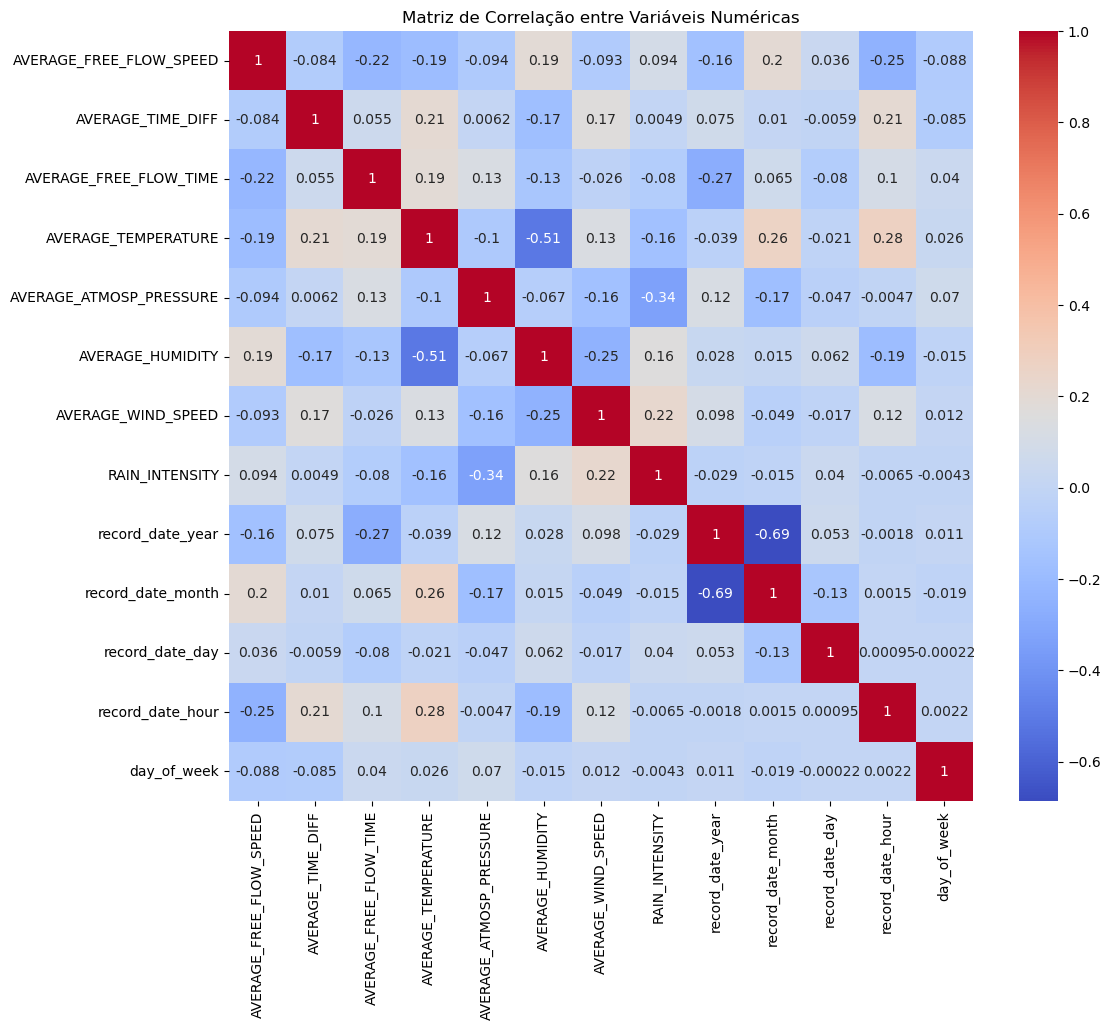

In [43]:
# Matriz de correlação das variáveis numéricas
plt.figure(figsize=(12,10))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

*Como não temos nenhuma perto de 0.80 não tiramos nada*

**9. Tratar das Variáveis Categóricas**

In [44]:
train_df['AVERAGE_CLOUDINESS'].value_counts(dropna=False)


AVERAGE_CLOUDINESS
NaN                  2682
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: count, dtype: int64

**AVERAGE_CLOUDINESS (Ordinal)**

**Mapeamento da AVERAGE_CLOUDINESS para uma escala ordinal**

In [45]:
cloud_map = {
    "céu claro": 1,
    "céu limpo": 1,
    "céu pouco nublado": 2,
    "algumas nuvens": 2,
    "nuvens dispersas": 2,
    "nuvens quebrados": 3,
    "nuvens quebradas": 3,
    "tempo nublado": 4,
    "nublado": 4
}

train_df['AVERAGE_CLOUDINESS'] = train_df['AVERAGE_CLOUDINESS'].map(cloud_map)
test_df['AVERAGE_CLOUDINESS'] = test_df['AVERAGE_CLOUDINESS'].map(cloud_map)


In [46]:
train_df.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,RAIN_INTENSITY,record_date_year,record_date_month,record_date_day,record_date_hour,day_of_week
0,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0,2019,8,29,7,3
1,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,1.0,0,2018,8,10,14,4
2,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0,2019,9,1,16,6
3,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,1.0,0,2019,2,26,11,1
4,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0,2019,6,6,12,3


In [47]:
test_df.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,RAIN_INTENSITY,record_date_year,record_date_month,record_date_day,record_date_hour,day_of_week
0,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,1.0,0,2019,2,13,23,2
1,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,2.0,0,2018,11,28,20,2
2,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0,2018,8,14,5,1
3,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,2.0,0,2019,7,6,17,5
4,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,1,2018,10,15,6,0


**Imputação de valores não reconhecidos**

In [48]:
train_df["AVERAGE_CLOUDINESS"] = train_df["AVERAGE_CLOUDINESS"].fillna(0).astype(int)


In [49]:
test_df["AVERAGE_CLOUDINESS"] = test_df["AVERAGE_CLOUDINESS"].fillna(0).astype(int)

In [50]:
train_df['AVERAGE_CLOUDINESS'].value_counts(dropna=False)

AVERAGE_CLOUDINESS
0    2682
1    1735
2    1397
3     864
4     134
Name: count, dtype: int64

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   object 
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   object 
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   int64  
 10  RAIN_INTENSITY           6812 non-null   int8   
 11  record_date_year         6812 non-null   int32  
 12  record_date_month        6812 non-null   int32  
 13  record_date_day          6812 non-null   int32  
 14  record_date_hour        

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   object 
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   object 
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   int64  
 10  RAIN_INTENSITY           6812 non-null   int8   
 11  record_date_year         6812 non-null   int32  
 12  record_date_month        6812 non-null   int32  
 13  record_date_day          6812 non-null   int32  
 14  record_date_hour        

**LUMINOSITY**

In [53]:
train_df['LUMINOSITY'].value_counts(dropna=False)

LUMINOSITY
LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: count, dtype: int64

**Conversão da luminosidade para nível ordinal**

In [54]:
luminosity_mapping = {
    'DARK': 0,
    'LOW_LIGHT': 1,
    'LIGHT': 2
}

train_df['LUMINOSITY'] = train_df['LUMINOSITY'].map(luminosity_mapping)
test_df['LUMINOSITY'] = test_df['LUMINOSITY'].map(luminosity_mapping)

train_df['LUMINOSITY'].value_counts(dropna=False)

LUMINOSITY
2    3293
0    3253
1     266
Name: count, dtype: int64

**Ver estado atual tratamento Nan**

In [55]:
train_df.isnull().sum().sort_values(ascending=False)

AVERAGE_SPEED_DIFF         0
AVERAGE_FREE_FLOW_SPEED    0
AVERAGE_TIME_DIFF          0
AVERAGE_FREE_FLOW_TIME     0
LUMINOSITY                 0
AVERAGE_TEMPERATURE        0
AVERAGE_ATMOSP_PRESSURE    0
AVERAGE_HUMIDITY           0
AVERAGE_WIND_SPEED         0
AVERAGE_CLOUDINESS         0
RAIN_INTENSITY             0
record_date_year           0
record_date_month          0
record_date_day            0
record_date_hour           0
day_of_week                0
dtype: int64

In [56]:
train_df['AVERAGE_SPEED_DIFF'].value_counts(dropna=False)

AVERAGE_SPEED_DIFF
None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: count, dtype: int64

**Encoding do Target**

In [57]:
target_mapping = {
    'None': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very_High': 4
}

train_df['target'] = train_df['AVERAGE_SPEED_DIFF'].map(target_mapping)
train_df = train_df.drop(columns=['AVERAGE_SPEED_DIFF'])
train_df = train_df.rename(columns={'target': 'AVERAGE_SPEED_DIFF'})
train_df['AVERAGE_SPEED_DIFF'].value_counts(dropna=False)


AVERAGE_SPEED_DIFF
0    2200
2    1651
1    1419
3    1063
4     479
Name: count, dtype: int64

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 1   AVERAGE_TIME_DIFF        6812 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 3   LUMINOSITY               6812 non-null   int64  
 4   AVERAGE_TEMPERATURE      6812 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 6   AVERAGE_HUMIDITY         6812 non-null   float64
 7   AVERAGE_WIND_SPEED       6812 non-null   float64
 8   AVERAGE_CLOUDINESS       6812 non-null   int64  
 9   RAIN_INTENSITY           6812 non-null   int8   
 10  record_date_year         6812 non-null   int32  
 11  record_date_month        6812 non-null   int32  
 12  record_date_day          6812 non-null   int32  
 13  record_date_hour         6812 non-null   int32  
 14  day_of_week             

**DEW POINT**

In [ ]:
# Função para cálculo do ponto de orvalho
def add_dewpoint_features(df):
    # 1) Sanitização para estabilidade numérica
    rh = df["AVERAGE_HUMIDITY"].clip(lower=1, upper=100).values / 100.0
    tC = df["AVERAGE_TEMPERATURE"].clip(lower=-20, upper=45).values * units.degC

    # 2) Dew Point com metpy
    dp = dewpoint_from_relative_humidity(tC, rh).to("degC").magnitude

    # 3) Reduzir ruído
    df["DEW_POINT"] = np.round(dp, 1)
    df["TEMP_MINUS_DP"] = np.round(df["AVERAGE_TEMPERATURE"] - df["DEW_POINT"], 1)

    # 4) Versão discreta robusta (para drift)
    bins = [-50, 0, 5, 10, 15, 50]
    labels = [0, 1, 2, 3, 4]
    
    df["DEW_POINT_BIN"] = pd.cut(df["DEW_POINT"], bins=bins, labels=labels,
                                 include_lowest=True).astype("int64")
    return df

In [60]:
train_df.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,RAIN_INTENSITY,record_date_year,record_date_month,record_date_day,record_date_hour,day_of_week,AVERAGE_SPEED_DIFF
0,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,0,0,2019,8,29,7,3,2
1,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1,0,2018,8,10,14,4,3
2,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,0,0,2019,9,1,16,6,3
3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1,0,2019,2,26,11,1,3
4,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,0,0,2019,6,6,12,3,2


In [61]:
train_df = add_dewpoint_features(train_df)
test_df  = add_dewpoint_features(test_df)

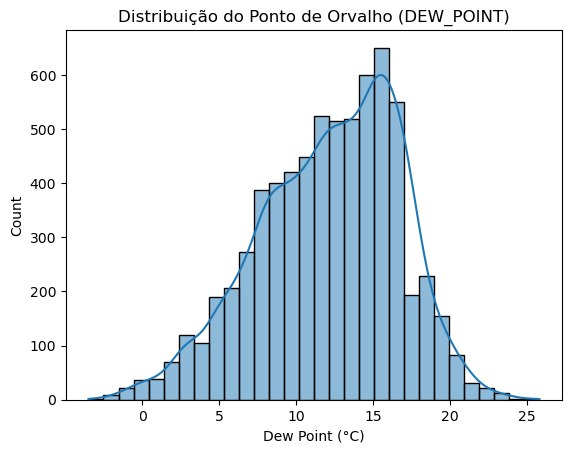

In [62]:
# Visualizar distribuição

sns.histplot(train_df["DEW_POINT"], bins=30, kde=True)
plt.title("Distribuição do Ponto de Orvalho (DEW_POINT)")
plt.xlabel("Dew Point (°C)")
plt.show()

**Mais feature engineering**

**FEATURE hora_de_ponta Hora de Ponta (duas granularidades)**

In [63]:
def is_peak_hour(hora):
    peak_hours = [7,8,9,17,18,19,20]
    return 1 if hora in peak_hours else 0

train_df['hora_de_ponta'] = train_df['record_date_hour'].apply(is_peak_hour)
print(train_df['hora_de_ponta'].value_counts())



test_df['hora_de_ponta'] = test_df['record_date_hour'].apply(is_peak_hour)
print(test_df['hora_de_ponta'].value_counts())


hora_de_ponta
0    4807
1    2005
Name: count, dtype: int64
hora_de_ponta
0    1090
1     410
Name: count, dtype: int64


**Hora de Ponta normal e acentuada**

*Hora de ponta menos acentuada (peak_hours_1): [7-8[ ou [17-18[ ou ]19-20]*

*Hora de ponta mais acentuada (peak_hours_2): [8-9] ou [18-19]*

Fonte: (https://www.metrodoporto.pt/uploads/document/file/399/3038_-_Estudo_de_Procura_Linha_Amarela_20170911.pdf)

In [64]:
peak_hours_1 = [7,17,20]

peak_hours_2 = [8,9,18,19]

def categorize_peak_hours(hour):
    if hour in peak_hours_2:
        return 2  # Hora de ponta mais acentuada
    elif hour in peak_hours_1:
        return 1  # Hora de ponta menos acentuada
    else:
        return 0  # Fora da hora de ponta
    
train_df['tipo_hora_de_ponta'] = train_df['record_date_hour'].apply(categorize_peak_hours)
print(train_df['tipo_hora_de_ponta'].value_counts())

test_df['tipo_hora_de_ponta'] = test_df['record_date_hour'].apply(categorize_peak_hours)
print(test_df['tipo_hora_de_ponta'].value_counts())

tipo_hora_de_ponta
0    4807
2    1142
1     863
Name: count, dtype: int64
tipo_hora_de_ponta
0    1090
2     240
1     170
Name: count, dtype: int64


**Feriados**

*Se for feriado, preenche a coluna com o valor 1 se não 0. Verifica para os feriados nacionais e municipais para a cidade do Porto durante os anos de 2018/2019*

fonte: "https://www.introducingporto.com/public-holidays"

In [65]:
holidays_pt = pd.to_datetime([
    '2018-01-01', # Ano Novo
    '2018-03-30', # Sexta-feira Santa
    '2018-04-01', # Páscoa
    '2018-04-25', # Dia da Liberdade
    '2018-05-01', # Dia do Trabalhador
    '2018-05-31', # Corpo de Deus
    '2018-06-10', # Dia de Portugal
    '2018-06-24', # São João
    '2018-08-15', # Assunção de Nossa Senhora
    '2018-10-05', # Implantação da República
    '2018-11-01', # Dia de Todos os Santos
    '2018-12-01', # Restauração da Independência
    '2018-12-08', # Imaculada Conceição
    '2018-12-25', # Natal
    '2019-01-01', # Ano Novo
    '2019-04-19', # Sexta-feira Santa
    '2019-04-21', # Páscoa
    '2019-04-25', # Dia da Liberdade
    '2019-05-01', # Dia do Trabalhador
    '2019-06-10', # Dia de Portugal
    '2019-06-20', # Corpo de Deus
    '2019-06-24', # São João
    '2019-08-15', # Assunção de Nossa Senhora
    '2019-10-05', # Implantação da República
    '2019-11-01', # Dia de Todos os Santos
    '2019-12-01', # Restauração da Independência
    '2019-12-08', # Imaculada Conceição
    '2019-12-25', # Natal
    ])


def is_holiday(row):

    year = int(row['record_date_year'])
    month = int(row['record_date_month'])
    day = int(row['record_date_day'])

    date = pd.Timestamp(year=year, month=month, day=day)
    return 1 if date in holidays_pt else 0

train_df['is_holiday'] = train_df.apply(is_holiday, axis=1)
print(train_df['is_holiday'].value_counts())

test_df['is_holiday'] = test_df.apply(is_holiday, axis=1)
print(test_df['is_holiday'].value_counts())

is_holiday
0    6568
1     244
Name: count, dtype: int64
is_holiday
0    1449
1      51
Name: count, dtype: int64


**Principais eventos na cidade do Porto**

*Eventos como jogos no estádio do Dragão, eventos musicais e culturais.*

Fontes
- [NOS Primavera Sound 2018: datas 7–9 de Junho](https://en.wikipedia.org/wiki/NOS_Primavera_Sound_2018)
- [NOS Primavera Sound 2019: datas 6–8 de Junho](https://www.festivais.pt/Festivais-2019/NOS-Primavera-Sound-2019.html)
- [Queima das Fitas do Porto 2019: 5 a 11 de maio](https://www.coolture.pt/event/queima-das-fitas-do-porto-2019)
- [Festa de São João do Porto: 23 de junho](https://en.wikipedia.org/wiki/Festa_de_S%C3%A3o_Jo%C3%A3o_do_Porto)
- [Feira do Livro do Porto 2019: 6 a 22 de setembro](https://www.up.pt/portuguesuporto/2019/09/04/feira-do-livro-do-porto)

In [66]:
def load_event_dates(file_path):
    event_dates = pd.read_csv(file_path, header=None, names=['date', 'event'])
    event_dates['date'] = pd.to_datetime(event_dates['date'], format='%Y-%m-%d', errors='coerce')
    return event_dates

event_dates = load_event_dates('eventos.csv')

def is_event_day(row, event_dates):
    year = int(row['record_date_year'])
    month = int(row['record_date_month'])
    day = int(row['record_date_day'])

    date = pd.Timestamp(year=year, month=month, day=day)
    return 1 if date in event_dates['date'].values else 0

train_df['is_event_day'] = train_df.apply(is_event_day, axis=1, event_dates=event_dates)
print(train_df['is_event_day'].value_counts())

test_df['is_event_day'] = test_df.apply(is_event_day, axis=1, event_dates=event_dates)
print(test_df['is_event_day'].value_counts())

is_event_day
0    5551
1    1261
Name: count, dtype: int64
is_event_day
0    1234
1     266
Name: count, dtype: int64


**Afluência aos Supermercados**

*Identifica os casos de afluência ao supermercado e preenche a nova coluna da seguinte maneira*

- **0 — Baixa afluência**
- **1 — Pico moderado**
- **2 — Pico forte**

*A distribuição dos picos segue o comportamento típico dos consumidores:*
- **Dias úteis: maior movimento ao final da tarde, após o horário de trabalho.**
- **Fins de semana: picos longos durante a tarde, com maior flexibilidade horária.**


Fontes: 

- [Relatório "5 anos SIBS Analytics"](https://www.sibsanalytics.com/wp-content/uploads/2024/05/5-anos-SIBS-Analytics-PT.pdf)

In [67]:
def supermarket_peak_level(row):
    hour = int(row["record_date_hour"])
    weekday = int(row["day_of_week"])

    # Dias úteis (0=segunda ... 4=sexta)
    if weekday <= 4:
        if 17 <= hour <= 20:
            return 2  # pico forte
        if (8 <= hour <= 10) or (12 <= hour <= 14):
            return 1  # pico moderado
        return 0  # fraco

    # Sábado (5)
    if weekday == 5:
        if 15 <= hour <= 19:
            return 2
        if 10 <= hour <= 12:
            return 1
        return 0

    # Domingo (6)
    if weekday == 6:
        if 16 <= hour <= 19:
            return 1
        if 10 <= hour <= 12:
            return 1
        return 0

    return 0

train_df['supermarket_peak_level'] = train_df.apply(supermarket_peak_level, axis=1)
print(train_df['supermarket_peak_level'].value_counts())

test_df['supermarket_peak_level'] = test_df.apply(supermarket_peak_level, axis=1)
print(test_df['supermarket_peak_level'].value_counts())

supermarket_peak_level
0    4176
1    1603
2    1033
Name: count, dtype: int64
supermarket_peak_level
0    939
1    355
2    206
Name: count, dtype: int64


**Período Escolar**

*Prenche com 1 ou 0, depedendo se está em periodo escolar ou não*

Fontes:
- (https://fne.pt/pt/noticias/go/acontece-calendario-escolar-2018-2019)

In [68]:

# Cada período é representado como (data_início, data_fim)
periodos_escolares = [
    # Ano letivo 2018/2019
    (pd.Timestamp(2018, 9, 12), pd.Timestamp(2018, 12, 14)),  # 1º período
    (pd.Timestamp(2019, 1, 3),  pd.Timestamp(2019, 4, 5)),    # 2º período
    (pd.Timestamp(2019, 4, 23), pd.Timestamp(2019, 6, 21)),   # 3º período (máximo)
]


def is_school_period(row):
    year = int(row["record_date_year"])
    month = int(row["record_date_month"])
    day = int(row["record_date_day"])

    data = pd.Timestamp(year, month, day)

    for inicio, fim in periodos_escolares:
        if inicio <= data <= fim:
            return 1
    return 0



train_df["periodo_aulas"] = train_df.apply(is_school_period, axis=1)
print(train_df["periodo_aulas"].value_counts())

test_df["periodo_aulas"] = test_df.apply(is_school_period, axis=1)
print(test_df["periodo_aulas"].value_counts())


periodo_aulas
1    3908
0    2904
Name: count, dtype: int64
periodo_aulas
1    869
0    631
Name: count, dtype: int64


**Se é fim de semana**

In [69]:
def e_fim_de_semana(row):
    weekday = int(row["day_of_week"])

    if weekday in (5,6):
            return 1 
    return 0

train_df['fim_de_semana'] = train_df.apply(e_fim_de_semana, axis=1)
print(train_df['fim_de_semana'].value_counts())

test_df['fim_de_semana'] = test_df.apply(e_fim_de_semana, axis=1)
print(test_df['fim_de_semana'].value_counts())

fim_de_semana
0    4821
1    1991
Name: count, dtype: int64
fim_de_semana
0    1074
1     426
Name: count, dtype: int64


In [70]:
train_df.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,RAIN_INTENSITY,...,DEW_POINT,TEMP_MINUS_DP,DEW_POINT_BIN,hora_de_ponta,tipo_hora_de_ponta,is_holiday,is_event_day,supermarket_peak_level,periodo_aulas,fim_de_semana
0,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,0,0,...,15.0,0.0,3,1,1,0,0,0,0,0
1,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1,0,...,11.0,10.0,3,0,0,0,0,1,0,0
2,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,0,0,...,17.9,8.1,4,0,0,0,1,1,0,1
3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1,0,...,6.8,11.2,2,0,0,0,1,0,1,0
4,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,0,0,...,11.9,3.1,3,0,0,0,1,1,1,0


**Encoding cíclico**

*Transforma variáveis temporais em `(sin, cos)` para preservar ciclicidade.*

**congestion_ratio**

*Rácio entre diferença de tempo e tempo em free-flow.*

In [ ]:
def add_cyclical(df: pd.DataFrame) -> pd.DataFrame:
    # hour (0-23)
    df["hour_sin"] = np.sin(2 * np.pi * df["record_date_hour"] / 24)
    df["hour_cos"] = np.cos(2 * np.pi * df["record_date_hour"] / 24)

    # day of week (0-6)
    df["dow_sin"]  = np.sin(2 * np.pi * df["day_of_week"] / 7)
    df["dow_cos"]  = np.cos(2 * np.pi * df["day_of_week"] / 7)

    # month (1-12)
    df["month_sin"] = np.sin(2 * np.pi * df["record_date_month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["record_date_month"] / 12)

    return df

train_df = add_cyclical(train_df)
test_df  = add_cyclical(test_df)

# congestion_ratio
eps = 1e-9
for df in (train_df, test_df):
    df["congestion_ratio"] = df["AVERAGE_TIME_DIFF"] / (df["AVERAGE_FREE_FLOW_TIME"] + eps)

train_df[["hour_sin","hour_cos","dow_sin","dow_cos","month_sin","month_cos","congestion_ratio"]].head()


,hour_sin,hour_cos,dow_sin,dow_cos,month_sin,month_cos,congestion_ratio
0,9.659258e-01,-0.258819,0.433884,-0.900969,-8.660254e-01,-5.000000e-01,0.161064
1,-5.000000e-01,-0.866025,-0.433884,-0.900969,-8.660254e-01,-5.000000e-01,0.552632
2,-8.660254e-01,-0.500000,-0.781831,0.623490,-1.000000e+00,-1.836970e-16,0.450704
3,2.588190e-01,-0.965926,0.781831,0.623490,8.660254e-01,5.000000e-01,0.648247
4,1.224647e-16,-1.000000,0.433884,-0.900969,1.224647e-16,-1.000000e+00,0.654545



**10. Exportação dos Dados Preparados**



In [72]:

train_df.to_csv("train_data_prepared.csv", index=False, encoding="utf-8")
test_df.to_csv("test_data_prepared.csv", index=False, encoding="utf-8")